In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [13]:
df = pd.read_csv('3-customersatisfaction.csv')

In [14]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             100 non-null    int64  
 1   Customer Satisfaction  100 non-null    float64
 2   Incentive              100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [16]:
df.columns

Index(['Unnamed: 0', 'Customer Satisfaction', 'Incentive'], dtype='object')

In [17]:
df

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365
...,...,...,...
95,95,2.055072,8.686851
96,96,0.864149,2.901486
97,97,-1.586101,0.786207
98,98,1.558528,5.447475


In [18]:
df.describe()

,Unnamed: 0,Customer Satisfaction,Incentive
count,100.000000,100.000000,100.000000
mean,49.500000,-0.005427,3.445220
std,29.011492,1.721792,2.911818
min,0.000000,-2.992863,-1.068081
25%,24.750000,-1.431357,1.471341
50%,49.500000,0.109167,2.748839
75%,74.250000,1.421119,4.739113
max,99.000000,2.986736,11.000056


In [19]:
df.drop("Unnamed: 0", axis=1, inplace=True) # don't need index column

In [20]:
df

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365
...,...,...
95,2.055072,8.686851
96,0.864149,2.901486
97,-1.586101,0.786207
98,1.558528,5.447475


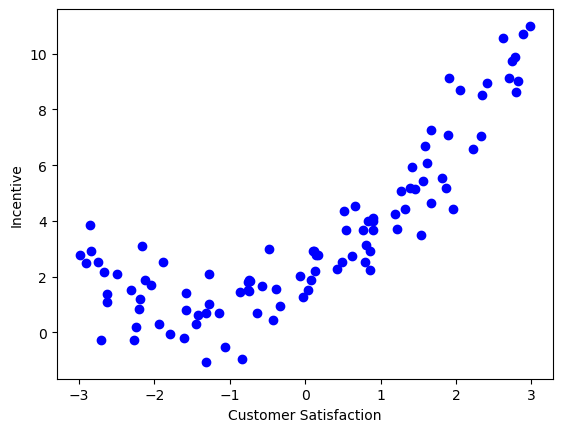

In [21]:
plt.scatter(df['Customer Satisfaction'],df['Incentive'],color ="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [23]:
# dependent | independent features

In [24]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [25]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [27]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [28]:
X_test

,Customer Satisfaction
84,0.785942
36,0.142978
57,-1.282120
51,1.910583
46,-0.029488
78,1.541346
93,0.810527
14,0.072354
11,1.449716
59,-2.315315


In [30]:
# scaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
## prediction

In [36]:
y_pred = regression.predict(X_test)

In [37]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [39]:
rScore = r2_score(y_test,y_pred)
print(rScore)

0.2705652535622246


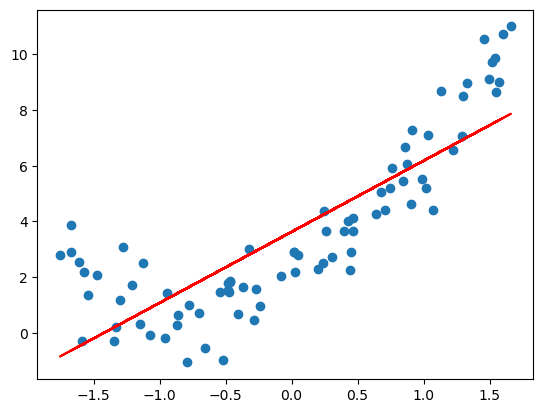

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.show()

In [41]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [42]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [44]:
# X_train_poly

In [45]:
polyRegression = LinearRegression()

In [46]:
polyRegression.fit(X_train_poly,y_train)

LinearRegression()

In [47]:
y_poly_pred = polyRegression.predict(X_test_poly)
score = r2_score(y_test,y_poly_pred)
print(score)

0.7685687698788557


In [48]:
polyRegression.coef_

array([0.        , 2.63871762, 1.54959954])

In [49]:
polyRegression.intercept_

np.float64(2.076676429793282)

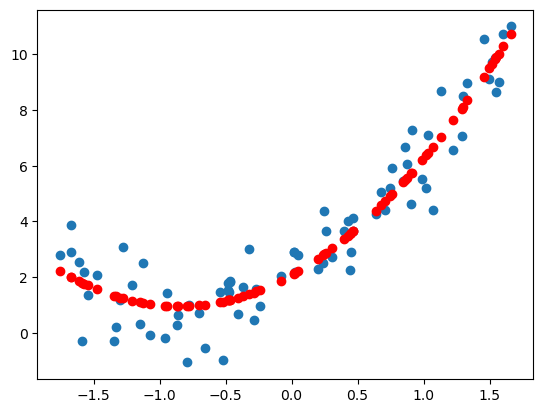

In [51]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,polyRegression.predict(X_train_poly),color="r")
plt.show()

In [52]:
poly = PolynomialFeatures(degree=3,include_bias=True) # try for degree 3 

In [53]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polyRegression = LinearRegression()
polyRegression.fit(X_train_poly,y_train)
y_poly_pred = polyRegression.predict(X_test_poly)
score = r2_score(y_test,y_poly_pred)
print(score)

0.757344362140105


In [54]:
# degree 2 is much more match with it!

In [55]:
new_df = pd.read_csv('3-newdatas.csv')

In [56]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [57]:
new_df.rename(columns= {"0":"Customer Satisfaction"}, inplace=True) # rename column name 0 to Customer Satisfaction

In [58]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [59]:
X_new = scaler.fit_transform(new_df)

In [60]:
X_new_poly = poly.transform(X_new)

In [61]:
y_new = polyRegression.predict(X_new_poly)

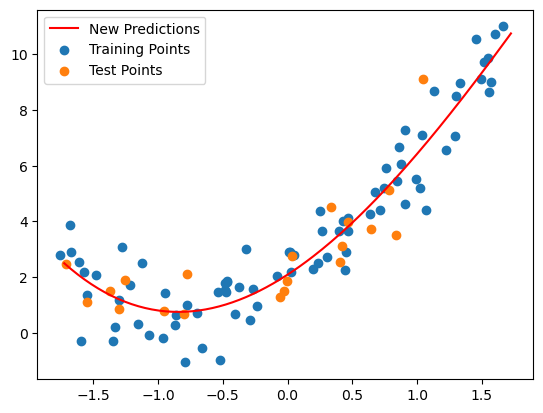

In [64]:
plt.plot(X_new,y_new,"r",label="New Predictions")
plt.scatter(X_train,y_train,label="Training Points")
plt.scatter(X_test,y_test,label="Test Points")
plt.legend()
plt.show()

In [65]:
# pipeline